# Data Augmentation

In [4]:
from sklearn.datasets import fetch_openml

In [23]:
import matplotlib.pyplot  as plt

In [247]:
import numpy as np

In [29]:
from scipy.ndimage.interpolation import shift

In [9]:
mnist=fetch_openml(name='mnist_784',version=1)

In [11]:
from scipy.ndimage.interpolation import shift

In [12]:
X,y=mnist["data"].values,mnist["target"].values

In [13]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [17]:
print("Shape of the data {},{},{},{} ".format(X_train.shape,X_test.shape,y_train.shape,y_test.shape))

Shape of the data (60000, 784),(10000, 784),(60000,),(10000,) 


In [182]:
sample_digit=X_train[1000]

In [183]:
sample_digit.shape

(784,)

In [184]:
test_image=sample_digit.reshape(28,28)

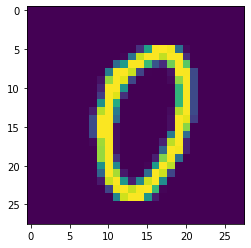

In [185]:
plt.imshow(test_image)

In [186]:
sample_target=y_train[1000]

In [187]:
sample_target

'0'

In [227]:
def shift_image(image,dx,dy):
    image=image.reshape(28,28)
    shifted_image=shift(image,[dy,dx],cval=0,mode='constant')
    return(shifted_image.reshape([-1]))

In [228]:
shifted_image_up=shift_image(sample_digit,0,-5)
shifted_image_down=shift_image(sample_digit,0,5)
shifted_image_left= shift_image(sample_digit,-5,0)
shifted_image_right=shift_image(sample_digit,5,0)

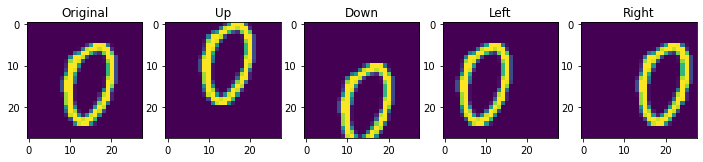

In [229]:
plt.figure(figsize=(12,3))
plt.subplot(1,5,1)
plt.title("Original")
plt.imshow(sample_digit.reshape(28,28),interpolation='nearest')

plt.subplot(1,5,2)
plt.title("Up")
plt.imshow(shifted_image_up.reshape(28,28),interpolation='nearest')

plt.subplot(1,5,3)
plt.title("Down")
plt.imshow(shifted_image_down.reshape(28,28),interpolation='nearest')

plt.subplot(1,5,4)
plt.title("Left")
plt.imshow(shifted_image_left.reshape(28,28),interpolation='nearest')

plt.subplot(1,5,5)
plt.title("Right")
plt.imshow(shifted_image_right.reshape(28,28),interpolation='nearest')

In [234]:
X_train_augmented=[image for image in X_train]
y_train_augmented=[label for label in y_train]

In [238]:
for image,label in zip(X_train,y_train):
    for dx,dy in ((0,-1),(0,1),(-1,0),(1,0)):
        shifted_image=shift_image(image,dx,dy)
        X_train_augmented.append(shifted_image)
        y_train_augmented.append(label)

In [239]:
print(len(X_train_augmented))
print(len(y_train_augmented))

300000
300000


In [248]:
X_train_augmented=np.array(X_train_augmented)

In [249]:
y_train_augmented=np.array(y_train_augmented)

In [250]:
shuffled_idx=np.random.permutation(len(X_train_augmented))

In [253]:
shuffled_idx

array([ 34653,  43779, 137078, ...,  64266, 112482, 191853])

In [254]:
X_train_augmented=X_train_augmented[shuffled_idx]

In [255]:
y_train_augmented=y_train_augmented[shuffled_idx]

In [256]:
from sklearn.neighbors import KNeighborsClassifier

In [257]:
#Best Params from previous exrecise
kn_clf=KNeighborsClassifier(n_neighbors=3, weights='distance')

In [258]:
kn_clf.fit(X_train_augmented,y_train_augmented)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [259]:
y_pred=kn_clf.predict(X_test)

In [261]:
from sklearn.metrics import accuracy_score

In [262]:
accuracy_score(y_test,y_pred)

0.9763

# Inference

* Accuracy score from  previous exrecise 0.9717
* Accuracy score by data augmentation 0.9763
* 0.5% of boost in Accuracy. Not bad :)